<a href="https://colab.research.google.com/github/gugi200/final_project/blob/main/project_y4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qU
!wandb login 3014974e724f01c4d63f956fa13fd7f0463e16d4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
!pip install torchmetrics
!pip install mlxtend>=0.19.0
!pip list | grep mlx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.9 MB/s eta 0:00:00
mlxtend                          0.22.0


In [3]:
#
#   Michael Gugala
#   02/12/2023
#   Image recognition
#   Master 4th year project
#   Univeristy of Bristol
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

import torchvision
from torchvision import datasets#
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchmetrics
from torchvision.models import resnet50, ResNet50_Weights
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import Bunch

from PIL import Image

import requests
import random
import shutil
import zipfile
from pathlib import Path
from io import BytesIO, StringIO
import os

import wandb
import cv2
from timeit import default_timer as timer
from tqdm.auto import tqdm

# check imports
print(torch.__version__)
print(torchvision.__version__)

#agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu121
0.16.0+cu121


'cuda'

# Download test data

In [4]:
# downloiad test data
from torchvision.datasets import FashionMNIST
from torchvision import transforms

train_data = FashionMNIST(
    root='~/.pytorch/F_MNIST_data',
    download=True,
    train=True,
    target_transform=None)

test_data = FashionMNIST(
    root='~/.pytorch/F_MNIST_data',
    download=True,
    train=False,
    target_transform=None)

class_names = [x.replace('/', '_').replace('-', '') for x in train_data.classes]

transform = transforms.ToPILImage()

100%|██████████| 26421880/26421880 [00:01<00:00, 14949944.48it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274300.00it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5007013.44it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19900716.12it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



# download costom data

In [5]:
colabPath = Path("custom_dataset")

#  Create a dir
if colabPath.is_dir():
    print('directory already exists')
else:
    colabPath.mkdir(parents=True, exist_ok=True)

# download zipped data
with open(colabPath / "dataset_pressure_sensor.zip", "wb") as f:
    request = requests.get("https://github.com/gugi200/final_project/raw/main/dataset_pressure_sensor.zip")
    f.write(request.content)


# unzip the data
with zipfile.ZipFile(colabPath / "dataset_pressure_sensor.zip", "r") as f:
    f.extractall(colabPath)



## process the data - rotation, transpose & rotation - VISUALISATION

In [ ]:
customDirPath = Path("custom_dataset/dataCollection1_sensor")
dirs = os.listdir(customDirPath)
files = os.listdir(customDirPath / dirs[0])


img = Image.open(customDirPath / dirs[0] / files[0])
imgNp1 = np.asarray(img)
imgNp1_T = np.transpose(imgNp1)

imgNp2 = np.rot90(imgNp1)
imgNp3 = np.rot90(imgNp2)
imgNp4 = np.rot90(imgNp3)


imgNp2_T = np.rot90(imgNp1_T)
imgNp3_T = np.rot90(imgNp2_T)
imgNp4_T = np.rot90(imgNp3_T)

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, constrained_layout = True)

ax1.imshow(imgNp1)
ax2.imshow(imgNp2)
ax3.imshow(imgNp3)
ax4.imshow(imgNp4)
ax6.imshow(imgNp1_T)
ax5.imshow(imgNp2_T)
ax8.imshow(imgNp3_T)
ax7.imshow(imgNp4_T)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax6.axis('off')
ax5.axis('off')
ax8.axis('off')
ax7.axis('off')
ax1.set_title("Original data\n")
ax2.set_title("Original data \nrotated \nby 270 deg")
ax3.set_title("Original data \nrotated \nby 180 deg")
ax4.set_title("Original data \nrotated \nby 90 deg")
ax6.set_title("Transposed \ndata\n")
ax5.set_title("Transposed \ndata rotated \nby 270 deg")
ax8.set_title("Transposed \ndata rotated \nby 180 deg")
ax7.set_title("Transposed \ndata rotated \nby 90 deg")

plt.show()

In [ ]:
dirs

# Data multiplication

In [6]:

customDirPath = Path("custom_dataset/dataCollection1_sensor")
dirs = os.listdir(customDirPath)


#  Create a dir with processed data
extendedDataPath = Path("extended_custom_dataset")
if extendedDataPath.is_dir():
    print('directory already exists')
else:
    extendedDataPath.mkdir(parents=True, exist_ok=True)
    for dir in dirs:
        path = extendedDataPath / dir
        path.mkdir(parents=True, exist_ok=True)



index = 0
for dir in dirs:
    files = os.listdir(customDirPath / dir)

    for file in files:
        img = Image.open(customDirPath / dir / file)
        imgNp = np.asarray(img)
        imgNp_T = np.transpose(imgNp)

        im = Image.fromarray(imgNp)
        im.save(f"{extendedDataPath}/{dir}/{dir}_{index}.jpg")

        im = Image.fromarray(imgNp_T)
        im.save(f"{extendedDataPath}/{dir}/{dir}_{index+1}.jpg")
        for i in range(3):
            imgNp = np.rot90(imgNp)
            imgNp_T = np.rot90(imgNp_T)

            im = Image.fromarray(imgNp)
            im.save(f"{extendedDataPath}/{dir}/{dir}_{(index) + (2*(i+1))}.jpg")

            im = Image.fromarray(imgNp_T)
            im.save(f"{extendedDataPath}/{dir}/{dir}_{(index) + (2*(i+1)) + 1}.jpg")

        index += 8
l = 0
for dir in dirs:
    l += len(os.listdir(extendedDataPath/dir))
    print(dir, len(os.listdir(extendedDataPath/dir)), len(os.listdir(customDirPath/dir)), len(os.listdir(customDirPath/dir))*8)
print(l)

h_bottle 8136 1017 8136
hand 8032 1004 8032
big_fizzy 8032 1004 8032
small_fizzy 8320 1040 8320
h_big_bottle 7824 978 7824
mug 8520 1065 8520
48864


## split the data into traina and test

In [7]:
TRAIN_RATIO = 0.75
dirs = os.listdir(extendedDataPath)


#  Create a dir for train and test data
extendedTrain = Path("extended_train")
extendedTest = Path("extended_test")
if extendedTrain.is_dir():
    print('directory already exists')
else:
    extendedTrain.mkdir(parents=True, exist_ok=True)
    extendedTest.mkdir(parents=True, exist_ok=True)
    for dir in dirs:
        path = extendedTrain / dir
        path.mkdir(parents=True, exist_ok=True)
    for dir in dirs:
        path = extendedTest / dir
        path.mkdir(parents=True, exist_ok=True)

for dir in dirs:
    files = os.listdir(extendedDataPath / dir)
    length = int(TRAIN_RATIO*len(files))
    random.shuffle(files)

    train_set = files[:length]
    test_set = files[length:]

    for data in train_set:
        shutil.copy(extendedDataPath / dir / data, extendedTrain / dir / data)

    for data in test_set:
        shutil.copy(extendedDataPath / dir / data, extendedTest / dir / data)

l = 0
for dir in dirs:
    l += len(os.listdir(extendedTrain/dir))
    print(dir, len(os.listdir(extendedTrain/dir)))
print(l)

l = 0
for dir in dirs:
    l += len(os.listdir(extendedTest/dir))
    print(dir, len(os.listdir(extendedTest/dir)))
print(l)


h_bottle 6102
hand 6024
big_fizzy 6024
small_fizzy 6240
h_big_bottle 5868
mug 6390
36648
h_bottle 2034
hand 2008
big_fizzy 2008
small_fizzy 2080
h_big_bottle 1956
mug 2130
12216


# Create a small data subset for testing


In [62]:
!rm -R short_test short_train

rm: cannot remove 'short_test': No such file or directory
rm: cannot remove 'short_train': No such file or directory


In [63]:

TRAIN_LENGTH_PER_CLASS = 100
TEST_LENGTH_PER_CLASS = 25
dirs = os.listdir(extendedDataPath)


#  Create a dir for train and test data
shortTrain = Path("short_train")
shortTest = Path("short_test")
if shortTrain.is_dir():
    print('directory already exists')
else:
    shortTrain.mkdir(parents=True, exist_ok=True)
    shortTest.mkdir(parents=True, exist_ok=True)
    for dir in dirs:
        path = shortTrain / dir
        path.mkdir(parents=True, exist_ok=True)
    for dir in dirs:
        path = shortTest / dir
        path.mkdir(parents=True, exist_ok=True)

for dir in dirs:
    files = os.listdir(extendedDataPath / dir)
    random.shuffle(files)

    train_set = files[:TRAIN_LENGTH_PER_CLASS]
    test_set = files[TRAIN_LENGTH_PER_CLASS:TRAIN_LENGTH_PER_CLASS+TEST_LENGTH_PER_CLASS]

    for data in train_set:
        shutil.copy(extendedDataPath / dir / data, shortTrain / dir / data)

    for data in test_set:
        shutil.copy(extendedDataPath / dir / data, shortTest / dir / data)

l = 0
for dir in dirs:
    l += len(os.listdir(shortTrain/dir))
    print(dir, len(os.listdir(shortTrain/dir)))
print(l)

l = 0
for dir in dirs:
    l += len(os.listdir(shortTest/dir))
    print(dir, len(os.listdir(shortTest/dir)))
print(l)


h_bottle 100
hand 100
big_fizzy 100
small_fizzy 100
h_big_bottle 100
mug 100
600
h_bottle 25
hand 25
big_fizzy 25
small_fizzy 25
h_big_bottle 25
mug 25
150


# split test dataset into dirs by class

In [9]:

from pathlib import Path

data_path = Path("data/")
image_path1 = data_path / "FashionMNIST" / "train"

if image_path1.is_dir():
    print('directory already exists')
else:
    print('creating folder')
    for class_name in class_names:
        image_class_path = image_path1 / class_name
        image_class_path.mkdir(parents=True, exist_ok=True)

    for idx, (train_img, target) in enumerate(zip(train_data.data[:1000], train_data.targets[:1000])):
        train_data_PIL = transform(train_img)
        file = "data_" + str(idx) + '.jpg'
        train_data_PIL.save(data_path / "FashionMNIST"/"train" / class_names[target] /file)


data_path = Path("data/")
image_path2 = data_path / "FashionMNIST" / "test"
if image_path2.is_dir():
    print('directory already exists')
else:
    print('creating folder')
    for class_name in class_names:
        image_class_path = image_path2 / class_name
        image_class_path.mkdir(parents=True, exist_ok=True)
        image_class_path.mkdir(parents=True, exist_ok=True)

    for idx, (test_img, target) in enumerate(zip(test_data.data[:250], test_data.targets[:250])):
        test_data_PIL = transform(test_img)
        file = "data_" + str(idx) + '.jpg'
        test_data_PIL.save(data_path / "FashionMNIST"/"test" / class_names[target] /file)





creating folder
creating folder


# Plan of action
A.
1. Create different CNN models
    * a few of my own making
    * restnet
    * maybe something else
2. Train them on MNIST fashion data scaled to 24x24
3. a Loop to find the best hyperparameters

B. Create SVM models in scikit learn
1. Create a pipeline with different hyper parameters


# Prepare data
* trasnform to tensors
* upscale to 224 (restnet size)
* normalize (apply different normalization)

In [ ]:
preprocess = transforms.Compose([

    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.25, 0.25, 0.25], std=[0.1, 0.1, 0.1]),
])
# path = colabPath / "dataCollection1_sensor"
# path_train = "data/FashionMNIST/train"
# path_test = "data/FashionMNIST/test"
path_train = "extended_train"
path_test = "extended_test"
train_data = datasets.ImageFolder(root=path_train,
                                 transform=preprocess, # tranform for the data
                                  target_transform=None) # transform for label


test_data = datasets.ImageFolder(root=path_test,
                                 transform=preprocess, # tranform for the data
                                  target_transform=None) # transform for label
class_names = train_data.classes

In [ ]:
# split data into batches
from torch.utils.data import DataLoader
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) #  shuffling to remove order

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) # here it doesn't matter, no point to waste resources


# iter tranforms it into iterable, next accesses the next batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

# display random datapoints
fig = plt.figure(figsize=(9, 9))
rows, cols  = 3, 3
for pic in range(1, 1+rows*cols):
    rand_int = np.random.randint(0, BATCH_SIZE)
    img = train_features_batch[rand_int]
    img_RGB = img.permute([1, 2, 0]).numpy()
    fig.add_subplot(rows, cols, pic)
    plt.imshow(img_RGB.squeeze())
    plt.axis(False)
    plt.title(class_names[train_labels_batch[rand_int]])





# Create models



### Create training loop

create dataset

In [60]:
from pickle import NONE
# create data set from a custom data
def create_dataset(path, batchsize, mean=None, std=None):
    '''
    input:
    path - path to the folder with the data
           eg for train - "data/FashionMNIST/train"
    batchsize - eg 32
    mean (optional)- for normalization eg. [0.25, 0.25, 0.25]
    std (optional)- for nortmalization eg [0.1, 0.1, 0.1]

    returns:
    dataloader with image size of 224
    class_names
    '''
    if mean:
        preprocess = transforms.Compose([

            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std),
        ])
    else:
        preprocess = transforms.Compose([

            transforms.Resize(size=(224, 224)),
            transforms.ToTensor()
        ])


    data = datasets.ImageFolder(root=Path(path),
                                    transform=preprocess, # tranform for the data
                                    target_transform=None) # transform for label
    dataloader = DataLoader(dataset=data,
                                batch_size=batchsize,
                                shuffle=True) #  shuffling to remove order
    class_names = data.classes
    return dataloader, class_names, data.targets

# visdualize 9 random images in a batch
def visualise_data(dataloader, class_names, batchsize):
    '''
    input dataloader
    class names

    displays 9 random images in a batch and their labels
    '''
    train_features_batch, train_labels_batch = next(iter(dataloader))
    print("length of data: ", len(train_features_batch), 'length of labels: ', len(train_labels_batch))
    # display random datapoints
    fig = plt.figure(figsize=(9, 9))
    rows, cols  = 3, 3
    for pic in range(1, 1+rows*cols):
        rand_int = np.random.randint(0, batchsize)
        img = train_features_batch[rand_int]
        img_RGB = img.permute([1, 2, 0]).numpy()
        fig.add_subplot(rows, cols, pic)
        plt.imshow(img_RGB.squeeze())
        plt.axis(False)
        plt.title(class_names[train_labels_batch[rand_int]])


# create optimizer
def create_optiimizer(model, optimizer, lr):
    '''
    inputs:
    model - CNN network
    optimizer - "adam" or "sgd"
    lr - learning rate eg. 0.01

    '''
    if optimizer=='adam':
        optimizer = torch.optim.Adam(model.parameters(),
                                     lr=lr
                                     )
    elif optimizer=='sgd':
        optimizer = torch.optim.SGD(model.parameters(),
                                     lr=lr,
                                    momentum=0.9
                                     )

    return optimizer


def get_lossFn():
    '''
        returns CrossEntropyLoss function
    '''

    return nn.CrossEntropyLoss()

# create train step
def train_step(model, metric, loss_fn, optimizer,
               data_loader, device, debug=False, wnb=True):
    '''
    model - CNN network
    metric - metric to calculate accuracy
    loss_fn - loss function
    optimizer - optimizer to be applied
    data_loader - dataloader
    device - decide for the model to train
    debug (optional)- if True prints average loss and metric of the batch

    returns
    train_loss - average loss of the batch
    train_acc - average metric score of the batch

    The function saves the metric score and loss of each iteration in WandB

    '''
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # put data on the device
        X, y = X.to(device), y.to(device)

        #forward pass, return raw logits
        y_pred = model(X)

        #loss
        loss = loss_fn(y_pred, y)
        #accuracy
        acc = metric(y, torch.argmax(y_pred, dim=1))

        train_loss += loss # accumulate train loss
        train_acc += acc # accumulate train accuracy

        # zero grad
        optimizer.zero_grad()

        # loss bacward
        loss.backward()

        #optimizer step
        optimizer.step()

        # log in wandb
        if wnb:
            wandb.log({"loss": loss,
                       'accuracy': acc})

    # device total loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    if debug:
        print(f'Train loss: {train_loss:.4f}, Train acc: {train_acc*100:0.4f}%')

    return train_loss, train_acc


# create test step
def test_step(model, metric, loss_fn, data_loader, device, debug=False, wnb=True):
    '''
    model - CNN network
    metric - metric to calculate accuracy
    loss_fn - loss function
    data_loader - dataloader
    device - decide for the model to train
    debug (optional)- if True prints average loss and metric of the batch

    returns
    test_loss - average loss of the batch
    test_acc - average metric score of the batch

    The function saves the metric score and loss of each iteration in WandB

    '''
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            #1 forward pass
            test_pred = model(X_test)

            # calculate loss
            loss = loss_fn(test_pred, y_test)
            test_loss += loss

            #accuracy
            acc = metric(y_test, test_pred.argmax(dim=1))
            test_acc += acc

            if wnb:
                wandb.log({"test loss": loss,
                           'test accuracy': acc})

        # Calculate the test loss average batch
        test_loss /= len(data_loader)

        # acc per bactch
        test_acc /= len(data_loader)

        # Print out what's happening
        if debug:
            print(f'Test loss: {test_loss:.4f}  |  Test acc: {test_acc*100:.4f}%')

        return test_loss, test_acc

# create evaluation loop
def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
               device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            #accumulate the loss and acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # ave loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works if a model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()*100}




def visualize_preds(model, dataloader, class_names, batchsize):
    plt.figure(figsize=(9, 9))
    nrows = 3
    ncols = 3
    model = model.cpu()

    dataL_len = len(dataloader)
    data = iter(dataloader)
    for i in range(3):
        model.eval()
        with torch.inference_mode():

            X, y = next(data)
            X, y = X.cpu(), y.cpu()
            for j in range(3):
                randint = np.random.randint(0, batchsize)
                X_sample, y_sample = X[randint], y[randint]
                pred_logit = model(X_sample.unsqueeze(dim=0))

                pred_prob = pred_logit.argmax(dim=1)


                plt.subplot(nrows, ncols, (3*i)+j+1);
                plt.imshow(X_sample.squeeze().permute([1, 2, 0]), cmap='gray');

                #find pred_label in text form
                pred_label = class_names[pred_prob];

                # find truth label
                truth_label = class_names[y_sample];

                title_text = f'Pred: {pred_label}  \n  Truth: {truth_label}'

                if pred_label==truth_label:
                    plt.title(title_text, fontsize=10, c='g');
                else:
                    plt.title(title_text, fontsize=10, c='r');
                plt.axis(False)
                plt.tight_layout()



def plot_decision_matrix(class_names, y_pred_tensor, targets):
    # setup confusion matrix
    confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
    confmat_tensor = confmat(preds=y_pred_tensor,
                            target=targets)

    # plot consufionmatrix
    fig, ax = plot_confusion_matrix(
        conf_mat=confmat_tensor.numpy(),
        class_names=class_names,
        figsize=(10, 7)
    )

def make_predictions(model, data, device):
    model.eval()
    data = data.to(device)
    model = model.to(device)
    with torch.inference_mode():
        y_preds = model(data)
    return y_preds.cpu()


def dataloader_to_numpy(dataloader):
    for i, (data, target) in enumerate(dataloader):
        if i==0:
            data_numpy = data.numpy()
            target_numpy = target.numpy()
        else:
            data_numpy = np.append(data_numpy, data.numpy(), axis=0)
            target_numpy = np.append(target_numpy, target.numpy(), axis=0)
    return data_numpy, target_numpy


def get_datalodaer(train_data_path, test_data_path, batchsize):

    train_dataloader, class_names, _ = create_dataset(
                                        path=train_data_path,
                                        batchsize=batchsize,
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                    )
    test_dataloader, _, _ = create_dataset(
                                path=test_data_path,
                                batchsize=batchsize,
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                    )
    return train_dataloader, test_dataloader, class_names


def train_test_loop(config, model, train_dataloader, test_dataloader,
                    class_names):
    loss_fn = get_lossFn()
    optimizer = create_optiimizer(model=model,
                                    optimizer=config.optimizer,
                                    lr=config.learning_rate
    )
    metric = torchmetrics.classification.Accuracy(
        task="multiclass",
        num_classes=len(class_names)
    ).to(device)
    train_time_start = timer()
    for epoch in range(config.epochs):
        ave_batch_loss, ave_batch_metric = train_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            optimizer=optimizer,
            data_loader=train_dataloader,
            device=device,
            debug=True
        )
        ve_batch_loss, ave_batch_metric = test_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            device=device,
            debug=True
        )
        wandb.log({"average train batch loss": ave_batch_loss,
                    "average train batch metric": ave_batch_metric,
                    "average test batch loss": ave_batch_loss,
                    "average test batch metric": ave_batch_metric,
                    "epoch": epoch
                    })
    train_time_end = timer()
    wandb.log({"train time": train_time_end - train_time_start})



## First test loop
test on FashionMNIST with a loop of different hyper parammeters and wandb experiment result collection

In [ ]:

train_dataloader, class_names, targets = create_dataset(
                                     path=path_train,
                                     batchsize=BATCH_SIZE
                                     )
test_dataloader, _, _ = create_dataset(
                             path=path_test,
                             batchsize=BATCH_SIZE
                             )

visualise_data(dataloader=train_dataloader, class_names=class_names, batchsize=BATCH_SIZE)

In [ ]:
class_names, len(targets), np.unique(np.array(targets)), max(targets)

# Run the testing resnet model with test data

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]


cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 1.2274, Train acc: 57.4405%
Test loss: 0.8151  |  Test acc: 67.5000%
Train loss: 0.6254, Train acc: 77.6786%
Test loss: 1.4661  |  Test acc: 65.4688%
Train loss: 0.5123, Train acc: 81.2500%
Test loss: 0.6663  |  Test acc: 75.1562%
Train loss: 0.3752, Train acc: 87.1032%
Test loss: 0.5385  |  Test acc: 81.4844%
Train loss: 0.3304, Train acc: 88.2937%
Test loss: 0.5085  |  Test acc: 81.2500%


<ipython-input-10-b39045ed7062>:250: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, (3*i)+j+1);


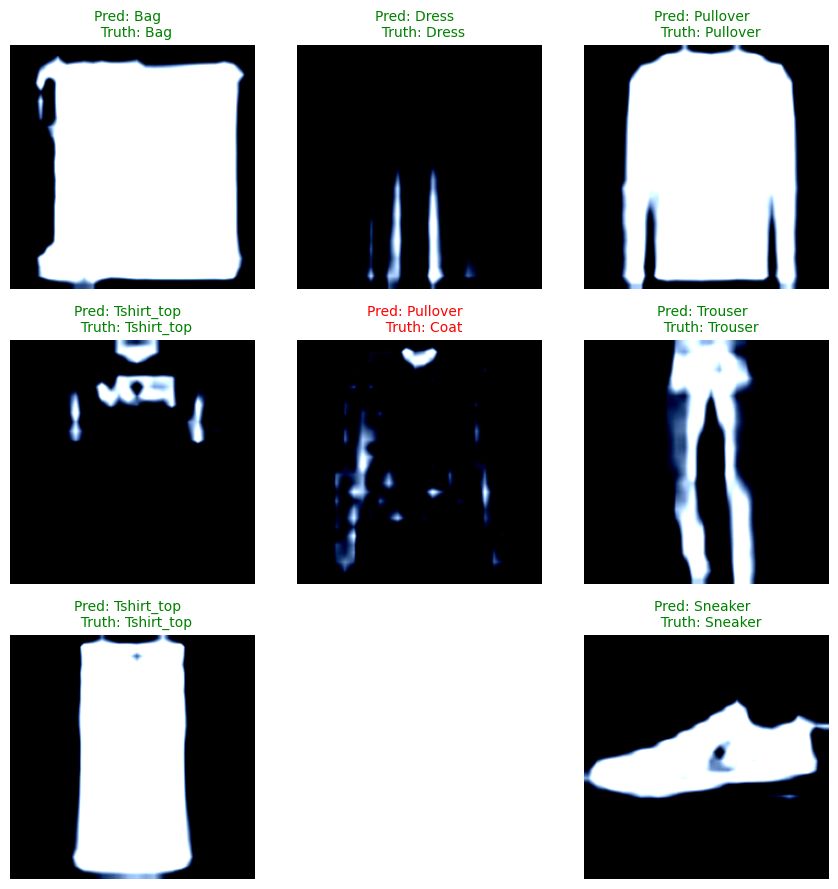

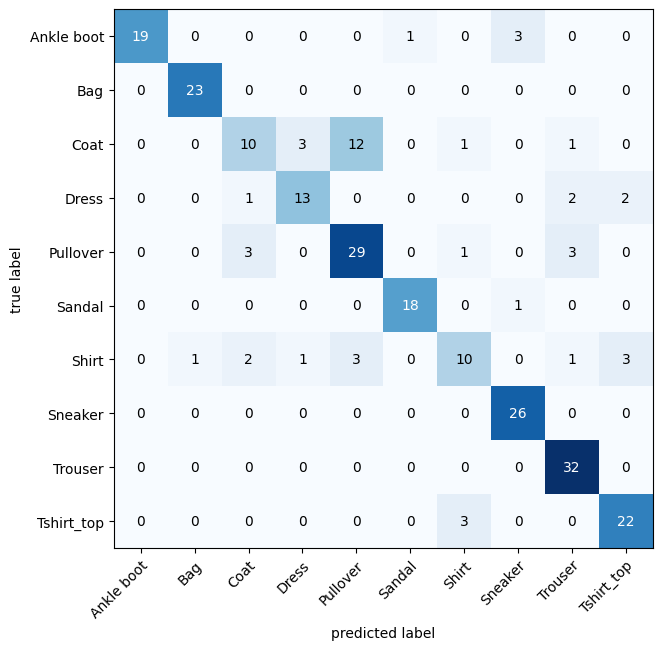

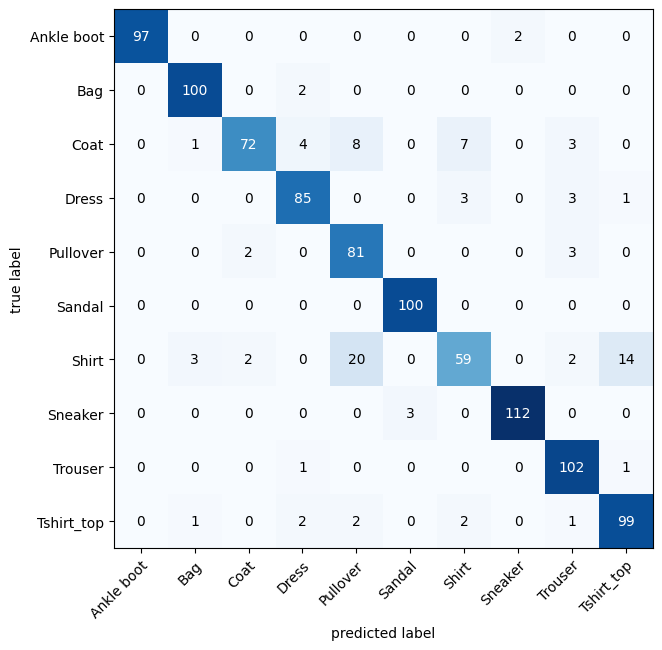

In [11]:
# test with no hyperparameter sweeping
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from torchvision.models import resnet50, ResNet50_Weights
BATCH_SIZE = 16
# get data
train_dataloader, class_names, targets = create_dataset(
                                    path="data/FashionMNIST/train",
                                    batchsize=BATCH_SIZE,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225]
                                )
test_dataloader, _, _ = create_dataset(
                            path="data/FashionMNIST/test",
                            batchsize=BATCH_SIZE,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225]
                                )

# get model
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(2048, len(class_names))


def train_model_restent50(train_dataloader, test_dataloader, lr, optimizer, batchsize, epochs, class_names, model):
    print(device)

    model = model.to(device)
    loss_fn = get_lossFn()
    optimizer = create_optiimizer(model=model,
                                    optimizer=optimizer,
                                    lr=lr
    )


    metric = torchmetrics.classification.Accuracy(
        task="multiclass",
        num_classes=len(class_names)
    ).to(device)
    train_time_start = timer()
    for epoch in tqdm(range(epochs)):
        ave_batch_loss, ave_batch_metric = train_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            optimizer=optimizer,
            data_loader=train_dataloader,
            device=device,
            wnb=False,
            debug=True
        )
        ve_batch_loss, ave_batch_metric = test_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            device=device,
            wnb=False,
            debug=True
        )

    train_time_end = timer()

    return model

newModel = train_model_restent50(train_dataloader=train_dataloader,
                                 test_dataloader=test_dataloader,
                                 lr=0.001,
                                 optimizer='adam',
                                 batchsize=BATCH_SIZE,
                                 epochs=5,
                                 class_names=class_names,
                                 model=model).cpu()

visualize_preds(model=newModel,
                dataloader=test_dataloader,
                class_names=class_names,
                batchsize=BATCH_SIZE)

data_test_numpy, target_test_numpy = dataloader_to_numpy(test_dataloader)

y_test_preds_tensor = make_predictions(model=newModel,
                           data=torch.tensor(data_test_numpy),
                           device=device
                        )

plot_decision_matrix(class_names=class_names,
                     y_pred_tensor=y_test_preds_tensor,
                     targets=torch.tensor(target_test_numpy))


data_train_numpy, target_train_numpy = dataloader_to_numpy(train_dataloader)

y_train_preds_tensor = make_predictions(model=newModel,
                           data=torch.tensor(data_train_numpy),
                           device=device
                        )

plot_decision_matrix(class_names=class_names,
                     y_pred_tensor=y_train_preds_tensor,
                     targets=torch.tensor(target_train_numpy))



# Run the test model with subset of custom data

cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.4561, Train acc: 84.1333%
Test loss: 0.2936  |  Test acc: 90.0044%
Train loss: 0.2157, Train acc: 93.4000%
Test loss: 0.3703  |  Test acc: 87.6108%
Train loss: 0.1633, Train acc: 94.3833%
Test loss: 0.1407  |  Test acc: 96.1658%
Train loss: 0.1074, Train acc: 96.4833%
Test loss: 0.0928  |  Test acc: 97.7394%
Train loss: 0.0882, Train acc: 96.9667%
Test loss: 0.2362  |  Test acc: 92.4645%


<ipython-input-10-b39045ed7062>:250: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, (3*i)+j+1);


OutOfMemoryError: CUDA out of memory. Tried to allocate 4.49 GiB. GPU 0 has a total capacty of 14.75 GiB of which 3.97 GiB is free. Process 4790 has 10.78 GiB memory in use. Of the allocated memory 6.65 GiB is allocated by PyTorch, and 3.98 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

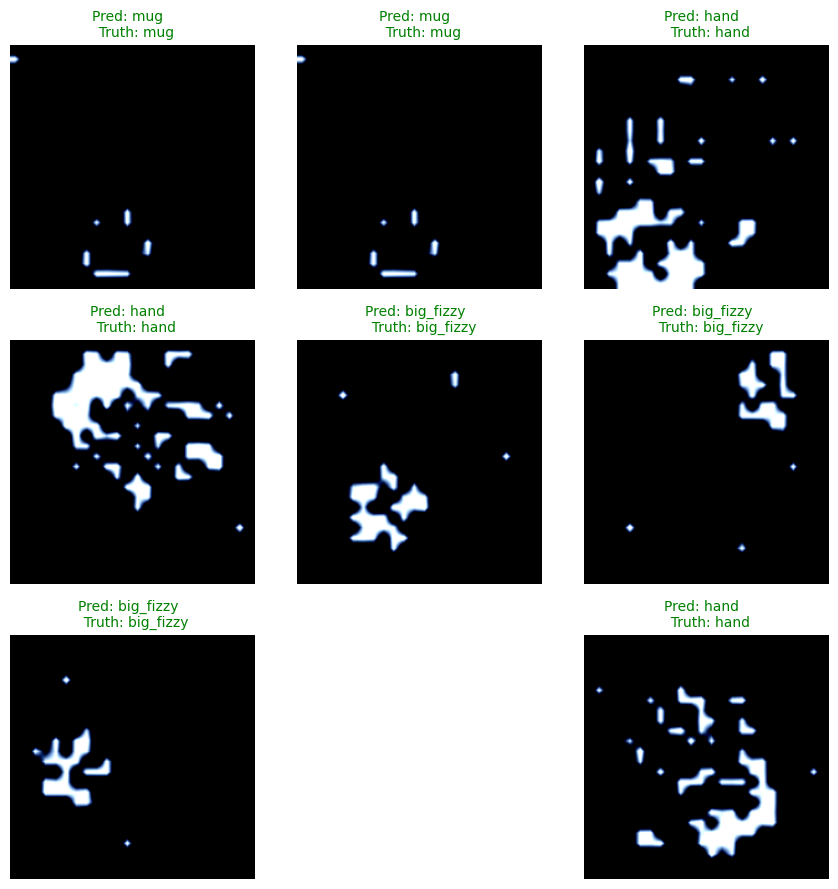

In [15]:
# test with no hyperparameter sweeping
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from torchvision.models import resnet50, ResNet50_Weights
BATCH_SIZE = 16
# get data
train_dataloader, class_names, targets = create_dataset(
                                    path=shortTrain,
                                    batchsize=BATCH_SIZE,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225]
                                )
test_dataloader, _, _ = create_dataset(
                            path=shortTest,
                            batchsize=BATCH_SIZE,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225]
                                )

# get model
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(2048, len(class_names))


def train_model_restent50(train_dataloader, test_dataloader, lr, optimizer, batchsize, epochs, class_names, model):
    print(device)

    model = model.to(device)
    loss_fn = get_lossFn()
    optimizer = create_optiimizer(model=model,
                                    optimizer=optimizer,
                                    lr=lr
    )


    metric = torchmetrics.classification.Accuracy(
        task="multiclass",
        num_classes=len(class_names)
    ).to(device)
    train_time_start = timer()
    for epoch in tqdm(range(epochs)):
        ave_batch_loss, ave_batch_metric = train_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            optimizer=optimizer,
            data_loader=train_dataloader,
            device=device,
            wnb=False,
            debug=True
        )
        ve_batch_loss, ave_batch_metric = test_step(
            model=model,
            metric=metric,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            device=device,
            wnb=False,
            debug=True
        )

    train_time_end = timer()

    return model

newModel = train_model_restent50(train_dataloader=train_dataloader,
                                 test_dataloader=test_dataloader,
                                 lr=0.001,
                                 optimizer='adam',
                                 batchsize=BATCH_SIZE,
                                 epochs=5,
                                 class_names=class_names,
                                 model=model).cpu()

visualize_preds(model=newModel,
                dataloader=test_dataloader,
                class_names=class_names,
                batchsize=BATCH_SIZE)

data_test_numpy, target_test_numpy = dataloader_to_numpy(test_dataloader)

y_test_preds_tensor = make_predictions(model=newModel,
                           data=torch.tensor(data_test_numpy),
                           device=device
                        )

plot_decision_matrix(class_names=class_names,
                     y_pred_tensor=y_test_preds_tensor,
                     targets=torch.tensor(target_test_numpy))


data_train_numpy, target_train_numpy = dataloader_to_numpy(train_dataloader)

y_train_preds_tensor = make_predictions(model=newModel,
                           data=torch.tensor(data_train_numpy),
                           device=device
                        )

plot_decision_matrix(class_names=class_names,
                     y_pred_tensor=y_train_preds_tensor,
                     targets=torch.tensor(target_train_numpy))



# The main loop

set up for the pipelines

In [64]:





torch.manual_seed(42)
torch.cuda.manual_seed(42)


sweep_config = {
    'method': 'grid'
    }
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }
sweep_config['metric'] = metric

parameters_dict = {
    'optimizer': {
        'values': ['adam', 'sgd']
        },
    'fc_layer_size': {
        'values': [6]
        },
    }

sweep_config['parameters'] = parameters_dict

parameters_dict.update({
    'epochs': {
        'value': 5}
    })

# parameters_dict.update({
#     'learning_rate': {
#         # a flat distribution between 0 and 0.1
#         'distribution': 'uniform',
#         'min': 0,
#         'max': 0.1
#       },
#     'batch_size': {
#         # integers between 32 and 256
#         # with evenly-distributed logarithms
#         'distribution': 'q_log_uniform_values',
#         'q': 8,
#         'min': 8,
#         'max': 32,
#       }
#     })

parameters_dict.update({
    'learning_rate': {
        # a flat distribution between 0 and 0.1
        'values': [0.001, 0.01, 0.1]
      },
    'batch_size': {
        # integers between 32 and 256
        # with evenly-distributed logarithms
        'values': [16, 32]
      }
    })



import pprint
pprint.pprint(sweep_config)


def train_model_resnet50(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        model = resnet50(
            weights=ResNet50_Weights.DEFAULT).to(device)
        model.fc = nn.Linear(2048 , config.fc_layer_size).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_alexnet(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('alexnet'))[-1]
        model = torch.hub.load('pytorch/vision', 'alexnet', weight).to(device)
        model.classifier[6] = nn.Linear(4096 , 10).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_convnext_base(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('convnext_base'))[-1]
        model = torch.hub.load('pytorch/vision', 'convnext_base', weight).to(device)
        model.classifier[2] = nn.Linear(1024 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_densenet161(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('densenet161'))[-1]
        model = torch.hub.load('pytorch/vision', 'densenet161', weight).to(device)
        model.classifier = nn.Linear(2208 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_efficientnet_v2_l(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('efficientnet_v2_l'))[-1]
        model = torch.hub.load('pytorch/vision', 'efficientnet_v2_l', weight).to(device)
        model.classifier[1] = nn.Linear(1280 , 10, bias=True).to(device).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_googlenet(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('googlenet'))[-1]
        model = torch.hub.load('pytorch/vision', 'googlenet', weight).to(device)
        model.fc = nn.Linear(1024 , 10, bias=True).to(device)
        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_inception_v3(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('inception_v3'))[-1]
        model = torch.hub.load('pytorch/vision', 'inception_v3', weight).to(device)
        model.fc = nn.Linear(2048 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_maxvit_t(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('maxvit_t'))[-1]
        model = torch.hub.load('pytorch/vision', 'maxvit_t', weight).to(device)
        model.classifier[5] = nn.Linear(512 , 10, bias=False).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_mobilenet_v3_large(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('mobilenet_v3_large'))[-1]
        model = torch.hub.load('pytorch/vision', 'mobilenet_v3_large', weight).to(device)
        model.classifier[3] = nn.Linear(1280 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model


def train_model_shufflenet_v2_x2_0(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('shufflenet_v2_x2_0'))[-1]
        model = torch.hub.load('pytorch/vision', 'shufflenet_v2_x2_0', weight).to(device)
        model.fc = nn.Linear(2048 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_swin_v2_t(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('swin_v2_t'))[-1]
        model = torch.hub.load('pytorch/vision', 'swin_v2_t', weight).to(device)
        model.head = nn.Linear(768 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_vgg19_bn(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('vgg19_bn'))[-1]
        model = torch.hub.load('pytorch/vision', 'vgg19_bn', weight).to(device)
        model.classifier[6] = nn.Linear(4096 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model

def train_model_wide_resnet50_2(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, test_dataloader, class_names = get_datalodaer(
            train_data_path = shortTrain,
            test_data_path = shortTest,
            batchsize=config.batch_size)

        weight = list(torchvision.models.get_model_weights('wide_resnet50_2'))[-1]
        model = torch.hub.load('pytorch/vision', 'wide_resnet50_2', weight).to(device)
        model.fc = nn.Linear(2048 , 10, bias=True).to(device)

        train_test_loop(config=config,
                        model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        class_names=class_names
                        )
    return model


count=10


{'method': 'grid',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'batch_size': {'values': [16, 32]},
                'epochs': {'value': 5},
                'fc_layer_size': {'values': [6]},
                'learning_rate': {'values': [0.001, 0.01, 0.1]},
                'optimizer': {'values': ['adam', 'sgd']}}}


# Run individual pipelines seperatelly to avoid system crashing

In [65]:
# restnet pipeline
sweep_id_restnet50 = wandb.sweep(sweep_config, project="restnet-test")
wandb.agent(sweep_id_restnet50, train_model_resnet50, count=count)

Create sweep with ID: bchi8ryg
Sweep URL: https://wandb.ai/gugi200/restnet-test/sweeps/bchi8ryg


wandb: Agent Starting Run: hsp1vrr3 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Train loss: 1.0634, Train acc: 57.8947%
Test loss: 1.4686  |  Test acc: 71.0417%
Train loss: 0.6279, Train acc: 76.4803%
Test loss: 0.5320  |  Test acc: 82.0833%
Train loss: 0.4468, Train acc: 85.0329%
Test loss: 0.9338  |  Test acc: 67.0833%
Train loss: 0.3235, Train acc: 89.6382%
Test loss: 0.5273  |  Test acc: 82.2917%
Train loss: 0.2849, Train acc: 91.4474%
Test loss: 0.4807  |  Test acc: 88.3333%


accuracy,▁▂▂▅▄▃▄▆▄▇▄▇▇▇▇▆█▇▄▇▇█▆▇█▇▇▇▇█▆▇▇█████▇▇
average test batch loss,█▄▂▁▁
average test batch metric,▂▆▁▆█
average train batch loss,█▄▂▁▁
average train batch metric,▂▆▁▆█
epoch,▁▃▅▆█
loss,█▆▆▄▆▅▅▃▅▂▄▂▂▂▂▃▂▂▃▂▂▁▃▂▁▂▂▂▂▁▄▂▁▁▁▁▁▁▂▂
test accuracy,▂▁▅▅▁▂▄▄▇▅▄▇▇▂▅▄▄▄▂▂▂▂▄▇▅▄▇▅▇▅▄██▄▇▇▅▇█▆
test loss,▄▃▃▂█▃▂▂▁▂▂▁▁▂▂▁▂▂▂▂▂▂▂▂▁▂▁▂▁▁▂▁▂▁▁▂▂▁▁▂
train time,▁
accuracy,0.875


wandb: Agent Starting Run: djlp2hm3 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Train loss: 1.7751, Train acc: 21.8750%
Test loss: 1.7687  |  Test acc: 30.4167%
Train loss: 1.6364, Train acc: 44.2434%
Test loss: 1.6260  |  Test acc: 53.1250%
Train loss: 1.3748, Train acc: 65.6250%
Test loss: 1.3946  |  Test acc: 51.8750%
Train loss: 0.9537, Train acc: 78.4539%
Test loss: 1.1559  |  Test acc: 57.7083%
Train loss: 0.5851, Train acc: 86.8421%
Test loss: 0.9474  |  Test acc: 64.1667%


accuracy,▁▁▁▁▁▃▂▃▄▃▃▅▅▅▆▅▆▅▅▅▅▅▆▆▇▆▅█▅▇▇▆█▆██████
average test batch loss,█▇▆▃▁
average test batch metric,▁▆▅▇█
average train batch loss,█▇▆▃▁
average train batch metric,▁▆▅▇█
epoch,▁▃▅▆█
loss,█████▇▇█▇▇▇▇▇▇▆▇▆▆▆▆▆▆▅▅▅▄▄▄▄▃▃▄▂▂▁▂▂▂▁▁
test accuracy,▂▅▁▂▂▂▄▂▃▆▃▇▅▂▃▅▅▇▅▆▃▅▅▅█▂▄▅▇▄▅▆▆▆▆▇▇▆▅▆
test loss,█▇████▇█▇▇▇▇▇▇▇▇▆▅▅▅▆▅▆▅▃▆▄▄▄▅▄▄▃▄▂▂▁▃▃▂
train time,▁
accuracy,1.0


wandb: Agent Starting Run: smposnwz with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Train loss: 1.8849, Train acc: 18.7500%
Test loss: 49.5667  |  Test acc: 15.6250%
Train loss: 1.7531, Train acc: 23.1908%
Test loss: 1.9441  |  Test acc: 18.5417%
Train loss: 1.7415, Train acc: 25.6579%
Test loss: 6.9956  |  Test acc: 16.6667%
Train loss: 1.6922, Train acc: 27.9605%
Test loss: 1.7038  |  Test acc: 21.6667%
Train loss: 1.6808, Train acc: 28.4539%
Test loss: 1.6300  |  Test acc: 28.9583%


accuracy,▅▅▃▂▄▃▅▄▅▄▁▅▅▄▅▅▄█▅▄▃▅▅▃▅▅▅▇▃▄▅▅▃▅▅▃▅▅▅▆
average test batch loss,█▃▃▁▁
average test batch metric,▁▃▂▄█
average train batch loss,█▃▃▁▁
average train batch metric,▁▃▂▄█
epoch,▁▃▅▆█
loss,█▃▆▃▃▂▃▂▁▂▄▂▂▂▂▂▄▁▃▃▂▂▂▄▂▁▂▂▃▁▁▂▁▂▂▃▁▂▂▁
test accuracy,▂▅▄▁▁▇▄▅▄▄▅▁▂▂▅▇▄▂▇▁▄▂▂▄▄█▅▂▁▇▅▄▅▅▄██▅▅▇
test loss,▇▅▆▆▇▆█▅▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.375


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: avbir2tx with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Train loss: 1.5118, Train acc: 39.4737%
Test loss: 1.1099  |  Test acc: 56.4583%
Train loss: 0.5823, Train acc: 79.4408%
Test loss: 0.8039  |  Test acc: 63.5417%
Train loss: 0.4351, Train acc: 86.0197%
Test loss: 0.5321  |  Test acc: 82.0833%
Train loss: 0.2334, Train acc: 92.1053%
Test loss: 0.4463  |  Test acc: 85.2083%
Train loss: 0.1455, Train acc: 94.9013%
Test loss: 0.2149  |  Test acc: 95.0000%


accuracy,▂▁▃▃▃▂▅▅▃▅▆▇▇▆▇▇▇▇▇▇█▇▇▆▇▇▇▇█▆█▇█▇▇████▆
average test batch loss,█▃▂▁▁
average test batch metric,▁▂▆▆█
average train batch loss,█▃▂▁▁
average train batch metric,▁▂▆▆█
epoch,▁▃▅▆█
loss,██▇█▆▇▆▅▅▄▄▂▂▃▂▂▃▂▂▃▂▂▃▂▂▂▂▂▁▄▁▂▁▂▂▁▁▁▁▂
test accuracy,▃▅▄▄▁▂▅▁▂▄▃▆▄▆▂▃▅▇▇▇▅▃▇▇▆▇▆▅▅▇▇▇██▇▇▇▇▇█
test loss,▆▅▇▆█▆▆▇▅▅▆▄▅▃▅▅▄▃▃▃▄▆▃▄▅▂▃▅▄▂▂▂▁▁▂▂▃▂▃▁
train time,▁
accuracy,0.75


wandb: Agent Starting Run: urec0gjx with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: adam


Train loss: 7.3456, Train acc: 28.6184%
Test loss: 92.3054  |  Test acc: 37.5000%
Train loss: 2.8162, Train acc: 32.2368%
Test loss: 21.1724  |  Test acc: 24.3750%
Train loss: 2.8773, Train acc: 35.0329%
Test loss: 1.8646  |  Test acc: 24.7917%
Train loss: 1.7580, Train acc: 35.3618%
Test loss: 1.7040  |  Test acc: 38.7500%
Train loss: 1.7270, Train acc: 29.4408%
Test loss: 1.3932  |  Test acc: 39.3750%


accuracy,▃▃▄▃▁▆█▄▆▃▄▄▃▃▂▃▅▆█▇▄▄▆▄▄▆▃▆▆▄▅▆▁▆▄▃▃▅▅▃
average test batch loss,█▂▂▁▁
average test batch metric,▇▁▁██
average train batch loss,█▂▂▁▁
average train batch metric,▇▁▁██
epoch,▁▃▅▆█
loss,█▃▁▂▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▅▄▇▅▂▂▇▇▃▃▆▁▄▄▇▃▂▂▃▂▅▄▄▂▄▂█▇▃▇▆▄▃▇▆█▅▂▄▇
test loss,█▅▅▅▆▂▂▇▃▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.25


wandb: Agent Starting Run: se795ao0 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd


Train loss: 1.4496, Train acc: 40.6250%
Test loss: 155.7287  |  Test acc: 16.6667%
Train loss: 0.9294, Train acc: 68.4211%
Test loss: 1.6656  |  Test acc: 58.9583%
Train loss: 0.6609, Train acc: 77.1382%
Test loss: 1.1694  |  Test acc: 67.7083%
Train loss: 0.4863, Train acc: 81.5789%
Test loss: 0.5004  |  Test acc: 82.0833%
Train loss: 0.4690, Train acc: 82.5658%
Test loss: 0.4060  |  Test acc: 84.3750%


accuracy,▁▁▃▆▅▆▅▅▇▄▇▆▃▆▆▅█▇▇▇▆▆▆█▇█▆▆██▆▅█▅▅▇▇▇▇▇
average test batch loss,█▄▂▁▁
average test batch metric,▁▅▆██
average train batch loss,█▄▂▁▁
average train batch metric,▁▅▆██
epoch,▁▃▅▆█
loss,▆▆▅▄▄▃▃▄▂▆▂▃█▃▂▄▂▂▁▂▃▃▃▁▂▂▂▃▁▁▃▃▁▃▃▂▂▂▂▁
test accuracy,▁▁▃▁▂▃▄▄▄▅▅▆▄▅▅▅▇▅▅▆▆▅▆▆▆▇▇▇▆▇▇▇▇█▆▆▇▆▇█
test loss,█▇▆▇▇▇▅▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.875


wandb: Agent Starting Run: f9hk4x9x with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Train loss: 1.2538, Train acc: 49.7807%
Test loss: 7.5064  |  Test acc: 22.7273%
Train loss: 0.5749, Train acc: 78.4539%
Test loss: 0.8895  |  Test acc: 66.7614%
Train loss: 0.3501, Train acc: 87.7193%
Test loss: 0.7552  |  Test acc: 76.9886%
Train loss: 0.1458, Train acc: 95.5044%
Test loss: 0.3856  |  Test acc: 87.5568%
Train loss: 0.1141, Train acc: 95.7237%
Test loss: 0.7196  |  Test acc: 83.5227%


accuracy,▂▁▂▅▅▆▆▆▅▅▆▇▆▆▇▅▇▆▇▇▇▇▇█▇█████▇▇████▇█▇█
average test batch loss,█▄▂▁▁
average test batch metric,▁▆▇██
average train batch loss,█▄▂▁▁
average train batch metric,▁▆▇██
epoch,▁▃▅▆█
loss,███▆▅▄▄▃▅▄▄▃▃▄▂▃▂▄▂▂▂▂▂▁▂▁▁▁▁▁▂▂▁▁▁▁▁▁▂▁
test accuracy,▁▁▃▂▁▅▆▆▆▆▆▆█▆▇█▇███▇▇▇▇█
test loss,▇█▄▆█▂▂▁▂▂▂▂▁▂▁▁▁▁▁▁▁▂▁▁▂
train time,▁
accuracy,1.0


wandb: Agent Starting Run: kcq7cvq2 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Train loss: 1.7928, Train acc: 15.8443%
Test loss: 1.7975  |  Test acc: 19.8864%
Train loss: 1.7517, Train acc: 29.3860%
Test loss: 1.7761  |  Test acc: 31.5909%
Train loss: 1.6985, Train acc: 43.1469%
Test loss: 1.7047  |  Test acc: 31.0795%
Train loss: 1.6293, Train acc: 49.4518%
Test loss: 1.6766  |  Test acc: 32.0455%
Train loss: 1.5415, Train acc: 57.6754%
Test loss: 1.6832  |  Test acc: 20.5114%


accuracy,▁▂▂▂▂▁▃▃▄▄▄▃▄▆▄▄▃▅▆▆▄▆▆▅▄▆▇▆▅▆▆▆▅▆▆▆▅▇▆█
average test batch loss,█▇▅▃▁
average test batch metric,▁█▇█▁
average train batch loss,█▇▅▃▁
average train batch metric,▁█▇█▁
epoch,▁▃▅▆█
loss,█▇████▇▇▇▇▆▇▇▆▇▆▇▆▅▅▆▅▅▅▆▄▃▄▄▄▃▃▄▄▂▂▃▁▂▁
test accuracy,▄▃▁▅▃▂▅▆▆█▄▅▇▆▄▅▆▆▆▄▃▄▃▂▃
test loss,▇██▇▇▇▇▇▆▆▆▄▃▄▅▄▃▃▃▄▃▁▅▅▅
train time,▁
accuracy,0.70833


wandb: Agent Starting Run: gw5jiy84 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Train loss: 1.6596, Train acc: 26.5899%
Test loss: 97851.2656  |  Test acc: 15.6250%
Train loss: 1.3237, Train acc: 44.5175%
Test loss: 222.4165  |  Test acc: 16.1932%
Train loss: 0.9286, Train acc: 61.3487%
Test loss: 57.4428  |  Test acc: 19.8295%
Train loss: 0.6973, Train acc: 74.9452%
Test loss: 15.0910  |  Test acc: 28.8068%
Train loss: 0.5108, Train acc: 79.2763%
Test loss: 1.1561  |  Test acc: 64.3182%


accuracy,▂▁▁▂▄▂▃▄▅▄▃▂▄▄▆▄▃▆▄▄▆▆▆▇▆▆▆▇▆▇█▅▆▇▇▇▇▇▆▇
average test batch loss,█▆▄▂▁
average test batch metric,▁▁▂▃█
average train batch loss,█▆▄▂▁
average train batch metric,▁▁▂▃█
epoch,▁▃▅▆█
loss,▇██▇▆▇▆▆▆▆▆▇▆▅▄▄▅▄▅▄▃▃▃▂▄▄▃▃▃▂▁▃▂▂▁▄▁▄▂▂
test accuracy,▂▄▃▃▁▃▃▃▃▂▃▃▃▃▄▄▄▃▄▅████▇
test loss,▇▆▆▆█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.875


wandb: Agent Starting Run: v1i25xg0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Train loss: 1.7011, Train acc: 27.7961%
Test loss: 1.8371  |  Test acc: 18.0114%
Train loss: 1.0728, Train acc: 66.9956%
Test loss: 1.4011  |  Test acc: 49.0341%
Train loss: 0.3508, Train acc: 87.0066%
Test loss: 0.2935  |  Test acc: 91.3068%
Train loss: 0.1955, Train acc: 92.2149%
Test loss: 0.4632  |  Test acc: 85.0568%
Train loss: 0.1516, Train acc: 95.6140%
Test loss: 0.7358  |  Test acc: 73.2955%


accuracy,▁▂▃▁▃▃▃▂▅▄▄▅▆▄▅▇▇▅▇▆▇▆█▇█▇█▇▇▇▇▇▇███▇██▇
average test batch loss,█▅▂▁▁
average test batch metric,▁▄█▇▆
average train batch loss,█▅▂▁▁
average train batch metric,▁▄█▇▆
epoch,▁▃▅▆█
loss,████▇▇▇▇▆▆▆▆▅▅▄▃▃▃▂▃▂▃▁▂▁▃▁▁▂▂▁▂▂▁▁▁▁▁▁▁
test accuracy,▁▂▂▁▁▅▃▄▅▅█████▇█▆▇█▆▇▆▆▆
test loss,█▇███▅▆▇▆▆▁▁▂▁▂▂▂▄▂▂▄▃▃▃▃
train time,▁
accuracy,0.91667


In [66]:
# alexnet pipeline
sweep_id_alexnet = wandb.sweep(sweep_config, project="alexnet-test")
wandb.agent(sweep_id_alexnet, train_model_alexnet, count=count)

Create sweep with ID: 616lzdeg
Sweep URL: https://wandb.ai/gugi200/alexnet-test/sweeps/616lzdeg


wandb: Agent Starting Run: nxw9kvcs with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 42.8MB/s]


Train loss: 1.9861, Train acc: 22.8618%
Test loss: 1.7458  |  Test acc: 23.9583%
Train loss: 1.8913, Train acc: 20.5592%
Test loss: 1.8090  |  Test acc: 16.6667%
Train loss: 1.8218, Train acc: 15.9539%
Test loss: 1.8082  |  Test acc: 16.6667%
Train loss: 1.8136, Train acc: 14.4737%
Test loss: 1.7954  |  Test acc: 17.7083%
Train loss: 1.8017, Train acc: 14.3092%
Test loss: 1.7961  |  Test acc: 16.6667%


accuracy,█▃▃▄▂▄▆▄▃▇▄▅▁▂▁▄▃▃▄▁▃▄▂▄▄▄▄▃▂▂▃▃▅▃▆▃▆▃▂▅
average test batch loss,█▄▂▁▁
average test batch metric,█▁▁▂▁
average train batch loss,█▄▂▁▁
average train batch metric,█▁▁▂▁
epoch,▁▃▅▆█
loss,▂▃▂▂▂▁▂▃▁▁█▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▂▂▂
test accuracy,▅▄▂██▄▄▂▄▂▄▂▄▅▅▂▇▁▁▄▂▁▄▄▁▂▅▄▂▅▂▄▁▁█▂▄▂▇▃
test loss,▃█▆▁▄█▆█▇▇▆▇▇▇▇▇▆██▆█▆▆▇▇▇▆▆▇▆▇▇▇▇▆▇▆▇▆▇
train time,▁
accuracy,0.25


wandb: Agent Starting Run: j20xuhq9 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.3431, Train acc: 47.3684%
Test loss: 0.6146  |  Test acc: 81.8750%
Train loss: 0.6274, Train acc: 76.9737%
Test loss: 0.6630  |  Test acc: 74.3750%
Train loss: 0.4170, Train acc: 83.2237%
Test loss: 0.2639  |  Test acc: 91.2500%
Train loss: 0.3225, Train acc: 90.1316%
Test loss: 0.2374  |  Test acc: 92.5000%
Train loss: 0.2061, Train acc: 92.7632%
Test loss: 0.5735  |  Test acc: 80.0000%


accuracy,▂▁▄▅▅▅▅▅▅▅▆▅▇█▇▇▆▅▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆██▇█▇█
average test batch loss,█▄▂▂▁
average test batch metric,▄▁██▃
average train batch loss,█▄▂▂▁
average train batch metric,▄▁██▃
epoch,▁▃▅▆█
loss,█▇▅▅▅▃▄▄▄▃▃▃▂▂▄▂▂▄▃▃▃▂▁▂▂▂▁▁▂▂▃▂▂▃▁▁▁▁▂▁
test accuracy,▅▇▅▅▅█▂▆▅▂▅▅▁▆▅▄▆▇▅▇▇▅█▇▅▇▇█▇█▅▇▅▄▇▇▆▅▆▁
test loss,▃▃▄▄▃▁▅▃▄▅▄▃▆▂▃▄▂▂▂▂▂▂▁▁▂▂▂▁▂▁▂▂▂▅▁▂▂▅▂█
train time,▁
accuracy,1.0


wandb: Agent Starting Run: b98ydl6l with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 3718.9614, Train acc: 15.4605%
Test loss: 1.8335  |  Test acc: 17.7083%
Train loss: 1.9275, Train acc: 14.4737%
Test loss: 1.7837  |  Test acc: 17.9167%
Train loss: 2.3774, Train acc: 16.2829%
Test loss: 1.8047  |  Test acc: 15.6250%
Train loss: 1.8420, Train acc: 16.1184%
Test loss: 1.7991  |  Test acc: 17.7083%
Train loss: 1.8103, Train acc: 16.4474%
Test loss: 1.7984  |  Test acc: 16.6667%


accuracy,▇▅▆▂▆▁▅█▅█▇▅▃▇▂▃▃▅▂▃▅▇▂█▂▃▅▃▇▁▃▂▅▂▆▃▂▂▂▁
average test batch loss,█▁▁▁▁
average test batch metric,▇█▁▇▄
average train batch loss,█▁▁▁▁
average train batch metric,▇█▁▇▄
epoch,▁▃▅▆█
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▆▃▄▆▁▄▃▁▅▅▄▂▂▂█▄▁▅▁▃▅▆▃▆▆▂▂▅▄▃▂▅▇▃▁▅▂▂▄▄
test loss,▄▇▅▃▆▆▆█▅▃▅▄▇▆▁▅▆▄▆▄▅▅▅▄▅▆▅▅▅▄▅▄▄▆▅▄▅▅▅▅
train time,▁
accuracy,0.0


wandb: Agent Starting Run: 8qvo0j2n with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: nan, Train acc: 15.9539%
Test loss: nan  |  Test acc: 15.6250%
Train loss: nan, Train acc: 16.7763%
Test loss: nan  |  Test acc: 16.6667%
Train loss: nan, Train acc: 16.6118%
Test loss: nan  |  Test acc: 16.6667%
Train loss: nan, Train acc: 16.7763%
Test loss: nan  |  Test acc: 15.6250%
Train loss: nan, Train acc: 16.4474%
Test loss: nan  |  Test acc: 19.7917%


accuracy,▃▁▅▇▅▃▆▃█▅▂▂▂▅▃▂▃▂▃▅▅▂▅▃▂▃▅▃▅▅▅▆▃▅▅▃▆▃▆▁
average test batch metric,▁▃▃▁█
average train batch metric,▁▃▃▁█
epoch,▁▃▅▆█
loss,▁▁█
test accuracy,▄▂▂▂▃▅▃▂▃▃▂▂▂▃▄▃▂▂▃▃▄▄▃▃▂▄▄▃▂▄▂▂▂▄▁▄▂▃▂█
train time,▁
accuracy,0.0
average test batch loss,nan
average test batch metric,0.19792
average train batch loss,nan


wandb: Agent Starting Run: 4n186bmr with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 622818164736.0000, Train acc: 15.9539%
Test loss: 62751.9141  |  Test acc: 17.7083%
Train loss: 260116.0469, Train acc: 15.2961%
Test loss: 68779.4219  |  Test acc: 16.6667%
Train loss: 81767.8281, Train acc: 16.6118%
Test loss: 1.8877  |  Test acc: 15.6250%
Train loss: 9577.4219, Train acc: 13.9803%
Test loss: 1.8022  |  Test acc: 15.6250%
Train loss: 5975.4072, Train acc: 18.0921%
Test loss: 1.7990  |  Test acc: 16.6667%


accuracy,█▂▅▄▂▇▄▂█▄▂▄▂▄▄▂▅▄▄▄▅▄▁▄▁▂▁▂▄█▁▇▅█▇▇▅▂▂▄
average test batch loss,█▁▁▁▁
average test batch metric,█▅▁▁▅
average train batch loss,█▁▁▁▁
average train batch metric,█▅▁▁▅
epoch,▁▃▅▆█
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▂▅▂▇█▇▄▂▅▅▅▅▅▂▄▇▅▅▄▄▅▇▂▄▄▅▅▇▅▅▇▂▇▄▁▇█▄▇▅
test loss,▆▇█▆▅▆▅▆██▆▆▇▆▅▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.125


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rqqo2rbe with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: nan, Train acc: 15.9539%
Test loss: nan  |  Test acc: 16.6667%
Train loss: nan, Train acc: 16.7763%
Test loss: nan  |  Test acc: 15.6250%
Train loss: nan, Train acc: 16.6118%
Test loss: nan  |  Test acc: 16.6667%
Train loss: nan, Train acc: 16.6118%
Test loss: nan  |  Test acc: 15.6250%
Train loss: nan, Train acc: 16.6118%
Test loss: nan  |  Test acc: 15.6250%


accuracy,▃▆▅▃▅▆▃▆▃▂▆▃▅▃▃▅▃▂▃▃▃▅▂▅▃█▆▅▂▂▂▅▅▆▃▁▂▆▅▃
average test batch metric,█▁█▁▁
average train batch metric,█▁█▁▁
epoch,▁▃▅▆█
loss,▁
test accuracy,▄▅▅▂▄█▄▄▄▄▅▄▇▄▇▇▅▅▅▅▄▄▂▇▄▅▂█▂▇▂▅▄▇▅▂▇▂▄▁
train time,▁
accuracy,0.125
average test batch loss,nan
average test batch metric,0.15625
average train batch loss,nan


wandb: Agent Starting Run: t4ere6gs with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 2.0162, Train acc: 23.6294%
Test loss: 1.7769  |  Test acc: 22.6705%
Train loss: 1.5982, Train acc: 31.0855%
Test loss: 1.5719  |  Test acc: 26.4773%
Train loss: 1.6223, Train acc: 33.2785%
Test loss: 1.6459  |  Test acc: 30.0568%
Train loss: 1.5526, Train acc: 32.8399%
Test loss: 1.8468  |  Test acc: 18.5795%
Train loss: 1.6570, Train acc: 29.1667%
Test loss: 1.4772  |  Test acc: 28.9205%


accuracy,▁▃▃▃▄▅▅▆▃▂▄▃▃▇▅▅▆▅▃▅▆▅▄▅▅▇▅▄▃▂▅▄▂▃█▄▃▄▄▆
average test batch loss,█▂▂▁▃
average test batch metric,▃▆█▁▇
average train batch loss,█▂▂▁▃
average train batch metric,▃▆█▁▇
epoch,▁▃▅▆█
loss,█▅▇▄▄▄▂▄▃▄▃▄▄▂▂▂▂▇▄▃▂▃▃▂▂▁▃▂▂▃▇▃▄▄▂▇▃▂▃▂
test accuracy,▃▅▆▂▄▆█▅▃▂▅▄▇▄█▂▃▄▁▅▅▄▇▇▄
test loss,▆▅▆▇▇▂▂▃▆▆▅▃▅▅▅▇▆██▄▃▅▁▂▃
train time,▁
accuracy,0.41667


wandb: Agent Starting Run: w07piz3k with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.4796, Train acc: 40.2961%
Test loss: 1.0633  |  Test acc: 53.6932%
Train loss: 0.8523, Train acc: 67.8728%
Test loss: 0.5424  |  Test acc: 79.2045%
Train loss: 0.4680, Train acc: 83.9364%
Test loss: 0.3246  |  Test acc: 87.8977%
Train loss: 0.3748, Train acc: 87.2259%
Test loss: 0.2965  |  Test acc: 90.9659%
Train loss: 0.2816, Train acc: 91.2281%
Test loss: 0.2763  |  Test acc: 90.3409%


accuracy,▁▁▃▄▄▃▄▅▅▆▆▆▆▆▆▇▇▇▆▆▇▇▇▆▇▇▇▇▇▆█▆█████▇█▇
average test batch loss,█▄▂▂▁
average test batch metric,▁▆▇██
average train batch loss,█▄▂▂▁
average train batch metric,▁▆▇██
epoch,▁▃▅▆█
loss,█▇▇▅▆▆▄▄▃▃▃▃▄▃▄▂▂▂▂▂▂▂▂▃▂▂▂▂▃▃▁▃▁▁▁▁▁▂▁▂
test accuracy,▃▁▂▃▃▇▅▆▆▆▇▇█▇▇█▇▇▇█▇▇▇██
test loss,▇██▇▆▄▄▄▄▄▂▂▁▂▃▂▃▂▃▂▁▃▃▁▁
train time,▁
accuracy,0.83333


wandb: Agent Starting Run: gyqbiozt with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 6359.5020, Train acc: 15.1864%
Test loss: 122.8124  |  Test acc: 20.5114%
Train loss: 127.7354, Train acc: 19.2982%
Test loss: 91.9938  |  Test acc: 18.5795%
Train loss: 64.4013, Train acc: 19.1886%
Test loss: 2.6571  |  Test acc: 17.3295%
Train loss: 2.6521, Train acc: 17.2149%
Test loss: 2.2145  |  Test acc: 17.0455%
Train loss: 2.0728, Train acc: 16.5022%
Test loss: 1.8141  |  Test acc: 16.7614%


accuracy,▁▄▄▄▄▆▃█▅▅▅▇▅▆▇▅▅▅▅▄▇▇▄▄▄▄▄▆▄▄▄▅▅▅▃▅▄▄▃▇
average test batch loss,█▁▁▁▁
average test batch metric,█▄▂▂▁
average train batch loss,█▁▁▁▁
average train batch metric,█▄▂▂▁
epoch,▁▃▅▆█
loss,▁█▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▄▆▅█▅▅▅▃▄█▇▄▁▃█▄▄▅▃▆▅▃▄▅▅
test loss,▆█▆▅▇▅▅▅▅▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train time,▁
accuracy,0.29167


wandb: Agent Starting Run: rjjzlxup with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 7.8101, Train acc: 14.8026%
Test loss: 779.2317  |  Test acc: 15.9091%
Train loss: nan, Train acc: 16.8311%
Test loss: nan  |  Test acc: 16.1932%
Train loss: nan, Train acc: 16.5570%
Test loss: nan  |  Test acc: 17.0455%
Train loss: nan, Train acc: 16.5570%
Test loss: nan  |  Test acc: 15.9091%
Train loss: nan, Train acc: 16.6118%
Test loss: nan  |  Test acc: 17.0455%


accuracy,▃▄▃▂▅▄▃▄▄▅▃▃▃▃▅▃▅▂▃▄▃▅▂▆▃▃▃▄▃▅▃▃▃▃▆▁▃█▃▃
average test batch loss,▁
average test batch metric,▁▃█▁█
average train batch loss,▁
average train batch metric,▁▃█▁█
epoch,▁▃▅▆█
loss,▁▁▁▁▁▁▁▁▁█
test accuracy,▅█▅▅▁▅▅▅▅▃▆▅▁▆▆▆▅▅▆▁▅▄▅▅▆
test loss,▄▁█▃▅
train time,▁
accuracy,0.125


In [67]:
# convnext_base pipeline
sweep_id_convnext_base = wandb.sweep(sweep_config, project="convnext_base-test")
wandb.agent(sweep_id_convnext_base, train_model_convnext_base, count=count)

Create sweep with ID: sgaagq6o
Sweep URL: https://wandb.ai/gugi200/convnext_base-test/sweeps/sgaagq6o


wandb: Agent Starting Run: x4eix78o with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth
100%|██████████| 338M/338M [00:08<00:00, 40.9MB/s]


Train loss: 2.0054, Train acc: 16.6118%
Test loss: 1.8231  |  Test acc: 31.6667%
Train loss: 1.7758, Train acc: 23.8487%
Test loss: 1.6068  |  Test acc: 19.1667%
Train loss: 1.4500, Train acc: 37.6645%
Test loss: 1.2931  |  Test acc: 46.8750%
Train loss: 1.1055, Train acc: 54.6053%
Test loss: 0.9092  |  Test acc: 69.7917%
Train loss: 0.8844, Train acc: 63.3224%
Test loss: 0.5578  |  Test acc: 80.0000%


accuracy,▃▂▃▂▃▃▁▂▃▃▃▃▄▃▃▂▅▄▅▅▄▅▃▄▆▆▃▅▅▆▆▇▇▅▄▆▇▇█▅
average test batch loss,█▇▅▂▁
average test batch metric,▂▁▄▇█
average train batch loss,█▇▅▂▁
average train batch metric,▂▁▄▇█
epoch,▁▃▅▆█
loss,█▇█▇▇▆▇▆▆▆▆▆▆▆▆▇▅▅▄▅▄▄▅▆▄▃▄▃▄▂▃▂▂▂▃▂▁▁▁▂
test accuracy,▄▃▂▃▂▃▄▃▂▃▂▂▃▁▂▁▄▄▄▅▃▅▁▄▆█▄▅▇▇▄▆▇█▆█▆▆▇▄
test loss,▆▇▇██▇▇▇▆▆▆▆▆▇▆▆▅▅▅▄▅▅▆▅▃▁▆▆▂▃▆▃▃▂▂▁▂▂▂▅
train time,▁
accuracy,0.5


wandb: Agent Starting Run: mqgmplpc with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.8328, Train acc: 28.2895%
Test loss: 1.3312  |  Test acc: 66.2500%
Train loss: 1.1034, Train acc: 68.2566%
Test loss: 0.6352  |  Test acc: 82.0833%
Train loss: 0.6346, Train acc: 82.0724%
Test loss: 0.3485  |  Test acc: 89.7917%
Train loss: 0.4215, Train acc: 87.3355%
Test loss: 0.2565  |  Test acc: 92.0833%
Train loss: 0.3198, Train acc: 90.2961%
Test loss: 0.1836  |  Test acc: 95.6250%


accuracy,▁▂▃▃▃▄▁▅▄▄▆▆▅▆▆█▇▆▅▆▇▇▇▆▇▇█▇▅█▇▇███▇▇█▇█
average test batch loss,█▅▂▁▁
average test batch metric,▁▅▇▇█
average train batch loss,█▅▂▁▁
average train batch metric,▁▅▇▇█
epoch,▁▃▅▆█
loss,██▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▃▂▂▁▂▃▁▂▂▂▁▁▂▂▁▁▁
test accuracy,▃▃▁▂▁▁▅▁▇▃▃▂▂▇▃▇▇▆▇▃▇▇██▆▇▆▆█▇▇▇███▇▇▇▇█
test loss,▇▇▇██▇▇█▄▄▃▄▄▄▄▃▂▂▂▄▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁
train time,▁
accuracy,1.0


wandb: Agent Starting Run: j2n5mkz4 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 2.5268, Train acc: 17.2697%
Test loss: 1.9091  |  Test acc: 15.6250%
Train loss: 1.9598, Train acc: 19.7368%
Test loss: 1.8224  |  Test acc: 15.6250%
Train loss: 1.8564, Train acc: 17.4342%
Test loss: 1.8174  |  Test acc: 15.6250%
Train loss: 1.8421, Train acc: 16.9408%
Test loss: 1.8373  |  Test acc: 16.6667%
Train loss: 1.8258, Train acc: 15.1316%
Test loss: 1.8261  |  Test acc: 15.6250%


accuracy,▆▂▆▂▅▂▅▆▃▅▆▆▅▇▂▂▇█▇▆▂▃▃▃▂▅▅▆▃▇▃▃▅▆▂▃▇▅▁▁
average test batch loss,█▂▁▁▁
average test batch metric,▁▁▁█▁
average train batch loss,█▂▁▁▁
average train batch metric,▁▁▁█▁
epoch,▁▃▅▆█
loss,▆█▃▅▅▃▂▄▃▂▁▃▁▂▄▂▂▁▂▂▂▂▂▂▃▂▂▁▂▂▂▂▂▂▂▂▁▂▂▂
test accuracy,▅█▄▇▁▅▄▅▅▅▄▇▂▁▇█▂▅▄▇▄▄▅█▂▄▂▅▇▇▇▅▇▄▇█▄▄▄▁
test loss,▅▃▅▃█▄▄▅▃▃▃▁▂▄▄▃▂▃▄▄▄▄▃▂▅▄▄▃▃▃▄▃▄▂▃▁▃▃▄▅
train time,▁
accuracy,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: etj8nob9 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.6791, Train acc: 32.5658%
Test loss: 1.7091  |  Test acc: 36.2500%
Train loss: 1.0947, Train acc: 57.2368%
Test loss: 0.3451  |  Test acc: 87.5000%
Train loss: 0.5634, Train acc: 79.6053%
Test loss: 0.5544  |  Test acc: 75.6250%
Train loss: 0.4510, Train acc: 82.8947%
Test loss: 0.3310  |  Test acc: 88.7500%
Train loss: 0.4011, Train acc: 86.3487%
Test loss: 0.1556  |  Test acc: 94.3750%


accuracy,▂▃▃▃▁▅▅▅▄▂▅▅▆▇▅█▇▅▆▆█▇▇▆▆▅▆▇▆▆████▇▇▇▇▇▆
average test batch loss,█▅▂▁▁
average test batch metric,▁▇▆▇█
average train batch loss,█▅▂▁▁
average train batch metric,▁▇▆▇█
epoch,▁▃▅▆█
loss,█▇▇▇█▅▅▅▄▇▄▄▄▂▅▂▂▃▃▃▂▄▂▄▃▅▃▃▂▂▁▁▂▂▄▂▂▂▂▄
test accuracy,▁▂▅▄▃▃▃▃▇▆█▆█▇█▇█▇▆▆▇▇▄▆▆███▇▆▇█▇███▆█▇█
test loss,█▆▅▅▆▅▆▆▁▂▂▂▂▃▁▂▂▂▂▂▂▁▃▂▂▂▁▂▂▂▃▂▁▁▁▁▂▁▂▁
train time,▁
accuracy,0.75


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1k0za65d with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 11.7193, Train acc: 16.4474%
Test loss: 4.6312  |  Test acc: 18.7500%
Train loss: 2.7921, Train acc: 15.6250%
Test loss: 1.9202  |  Test acc: 16.6667%
Train loss: 2.0088, Train acc: 15.9539%
Test loss: 1.8543  |  Test acc: 16.6667%
Train loss: 1.9266, Train acc: 14.8026%
Test loss: 1.9585  |  Test acc: 15.6250%
Train loss: 1.9333, Train acc: 15.9539%
Test loss: 2.0295  |  Test acc: 15.6250%


accuracy,▁▅▇▁▅▃▂▅▆▅▃▁▇▃▃▆▅▂▅▆▁▅▅▂▁▁▂▃▂▃▅▆▃▂▅█▅▁▂▆
average test batch loss,█▂▁▁▁
average test batch metric,█▃▃▁▁
average train batch loss,█▂▁▁▁
average train batch metric,█▃▃▁▁
epoch,▁▃▅▆█
loss,▆█▃▅▄▃▆▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▅▆▅▂▅▃▃▃▂▆▃▂▂▂█▆▃▂▇▅▅▅▂▆▅▃▅▁▆▃▆▆▃▅▂▆▅▆▆▁
test loss,▅▄▇▇▅▅█▆▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▂▁▂▁▂▁▁▂
train time,▁
accuracy,0.25


wandb: Agent Starting Run: xoe2i45c with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 281713.7812, Train acc: 19.0789%
Test loss: 2078312.3750  |  Test acc: 16.6667%
Train loss: 24513300480.0000, Train acc: 16.6118%
Test loss: 6333284352.0000  |  Test acc: 15.6250%
Train loss: 273748033536.0000, Train acc: 17.1053%
Test loss: 34756468736.0000  |  Test acc: 17.7083%
Train loss: 220250488832.0000, Train acc: 18.9145%
Test loss: 12433569792.0000  |  Test acc: 15.6250%
Train loss: 58056708096.0000, Train acc: 18.2566%
Test loss: 11907655680.0000  |  Test acc: 16.6667%


accuracy,▅▃▂▂▆▁▃▂▂▃▂▅▃▃▁▅▅▃▂▅▂▁█▅▃▃▅▅▅▂▂▃▃▂█▆▃▂▂▇
average test batch loss,▁▂█▇▂
average test batch metric,▅▁█▁▅
average train batch loss,▁▂█▇▂
average train batch metric,▅▁█▁▅
epoch,▁▃▅▆█
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▁▁▁▅▂▄▁▁▃▁▂▂█▂▁▁▂▁▁▁▁▁
test accuracy,▅▆▃▃▅▁▆▅▃▃▆█▅▃▁▆▅▃▅▃▁▃▅▁▆▃▅▃▃▅▅▆▅▆▅▁▅▁▃▄
test loss,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▇▇▇▇██▆▇▃▃▂▄▃▃▃▃▃▃▃▃▃▄▃▂
train time,▁
accuracy,0.375


wandb: Agent Starting Run: bg86swys with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.8989, Train acc: 17.8180%
Test loss: 1.4458  |  Test acc: 42.4432%
Train loss: 1.3702, Train acc: 43.6952%
Test loss: 0.8647  |  Test acc: 67.7273%
Train loss: 0.9133, Train acc: 60.2522%
Test loss: 0.5026  |  Test acc: 79.2045%
Train loss: 0.5598, Train acc: 77.8509%
Test loss: 0.3733  |  Test acc: 85.1705%
Train loss: 0.5431, Train acc: 80.3728%
Test loss: 0.3758  |  Test acc: 88.8636%


accuracy,▁▃▂▁▃▂▂▂▄▅▃▅▅▄▄▃▅▅▇▅▅▇▅▆▇▇▆▇▆▇▇▇▇██▇▇▇█▇
average test batch loss,█▅▃▁▁
average test batch metric,▁▅▇▇█
average train batch loss,█▅▃▁▁
average train batch metric,▁▅▇▇█
epoch,▁▃▅▆█
loss,█▇▇▆▆▆▆▅▅▄▆▄▅▄▄▄▄▄▃▃▃▃▃▂▁▁▂▂▂▂▂▂▂▂▁▃▂▂▁▁
test accuracy,▁▂▂▂▄▃▅▇▅▄▇▆▅▆▆▇█▇▇▅█▇▇▇▆
test loss,█▇▇▆▇▅▅▃▄▄▁▂▃▃▂▂▁▁▁▂▁▁▂▁▂
train time,▁
accuracy,0.83333


wandb: Agent Starting Run: zin4u849 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 2.0089, Train acc: 21.7105%
Test loss: 1.7288  |  Test acc: 31.4205%
Train loss: 1.6380, Train acc: 37.8838%
Test loss: 1.3730  |  Test acc: 59.8864%
Train loss: 1.2806, Train acc: 62.2807%
Test loss: 0.9133  |  Test acc: 83.2386%
Train loss: 0.9113, Train acc: 77.4671%
Test loss: 0.5965  |  Test acc: 87.6136%
Train loss: 0.6236, Train acc: 86.5680%
Test loss: 0.3984  |  Test acc: 89.7727%


accuracy,▁▁▂▃▂▂▃▂▂▂▃▄▃▃▃▃▅▄▄▄▇▇▇▇▆▆▇▆▇█▇██▇▇██▇█▇
average test batch loss,█▆▄▂▁
average test batch metric,▁▄▇██
average train batch loss,█▆▄▂▁
average train batch metric,▁▄▇██
epoch,▁▃▅▆█
loss,███▇▇▆▆▆▆▆▆▅▆▆▅▅▅▄▅▅▄▄▃▃▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂
test accuracy,▄▃▂▁▁▅▃▅▅▅█▇▆▆▇█▇▇▇▇▇█▇▇▇
test loss,█▇███▆▆▆▆▆▄▃▄▄▄▂▂▂▂▂▁▁▁▁▂
train time,▁
accuracy,0.79167


wandb: Agent Starting Run: wcqjdjxq with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 2.9900, Train acc: 13.3772%
Test loss: 1.8687  |  Test acc: 17.0455%
Train loss: 1.9540, Train acc: 18.0373%
Test loss: 1.8319  |  Test acc: 16.1932%
Train loss: 1.8879, Train acc: 16.0636%
Test loss: 1.8474  |  Test acc: 16.7614%
Train loss: 1.8930, Train acc: 15.7895%
Test loss: 1.7995  |  Test acc: 16.1932%
Train loss: 1.8657, Train acc: 15.5154%
Test loss: 1.8294  |  Test acc: 16.4773%


accuracy,▅▃▁▅▃▅▄▇▅▄▅███▆▅▅▅▅▇▆▅▄▅▅▅█▆█▄▆▅▅▅▂▆█▂▇▆
average test batch loss,█▂▁▁▁
average test batch metric,█▁▆▁▃
average train batch loss,█▂▁▁▁
average train batch metric,█▁▆▁▃
epoch,▁▃▅▆█
loss,▂▆█▃▃▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁
test accuracy,▅▃▅▃▆▄▅▅▅▂▄▃▅▅▅▃█▄▄▂▁▇▅▅▃
test loss,▃█▂▆▁▃▂▂▂▆▃▄▄▁▄▂▂▂▃▂▅▂▂▃▃
train time,▁
accuracy,0.16667


wandb: Agent Starting Run: iovjbx0q with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.6083, Train acc: 38.4868%
Test loss: 0.8835  |  Test acc: 58.9773%
Train loss: 0.8288, Train acc: 71.2719%
Test loss: 0.3773  |  Test acc: 84.1477%
Train loss: 0.5338, Train acc: 80.5373%
Test loss: 0.3245  |  Test acc: 87.9545%
Train loss: 0.3539, Train acc: 87.3903%
Test loss: 0.1916  |  Test acc: 93.8068%
Train loss: 0.2221, Train acc: 92.2149%
Test loss: 0.1296  |  Test acc: 95.0000%


accuracy,▁▂▂▂▂▄▄▄▅▄▇▆▇▆▇▄▆▆▇▇▅▇▇▇▆▇▇▇█▇▇▇█▆▇▇▇███
average test batch loss,█▄▃▂▁
average test batch metric,▁▆▇██
average train batch loss,█▄▃▂▁
average train batch metric,▁▆▇██
epoch,▁▃▅▆█
loss,█▇▆▆▆▅▅▅▄▄▃▃▃▃▂▅▃▃▂▂▃▂▃▂▃▂▂▂▁▂▂▂▁▃▂▂▂▁▁▁
test accuracy,▂▁▁▃▃▆▆▄▆▆▇▅▇█▅▇▇██▇▇▇█▇█
test loss,█▇█▇▇▃▃▆▃▃▃▅▂▂▄▃▂▁▂▂▂▁▁▃▁
train time,▁
accuracy,0.95833


In [68]:
# densenet161 pipeline
sweep_id_densenet161 = wandb.sweep(sweep_config, project="densenet161-test")
wandb.agent(sweep_id_densenet161, train_model_densenet161, count=count)

Create sweep with ID: 02yuc26u
Sweep URL: https://wandb.ai/gugi200/densenet161-test/sweeps/02yuc26u


wandb: Agent Starting Run: ouo435lg with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 142MB/s] 


Train loss: 0.8491, Train acc: 71.8750%
Test loss: 3.6278  |  Test acc: 42.5000%
Train loss: 0.4509, Train acc: 83.5526%
Test loss: 1.0029  |  Test acc: 69.7917%
Train loss: 0.3489, Train acc: 87.9934%
Test loss: 0.5810  |  Test acc: 78.7500%
Train loss: 0.3160, Train acc: 89.9671%
Test loss: 0.6484  |  Test acc: 75.2083%
Train loss: 0.4060, Train acc: 86.1842%
Test loss: 0.7056  |  Test acc: 71.8750%


accuracy,▁▄▃▄▂▆▄▄▂▇▅▆▃▇▇█▇▅█▆▆█▆▅▆▅█▇▇▆▇▇▇▃▂▅▆▅▇▆
average test batch loss,█▃▁▁▂
average test batch metric,▁▆█▇▇
average train batch loss,█▃▁▁▂
average train batch metric,▁▆█▇▇
epoch,▁▃▅▆█
loss,█▆▆▄▄▃▆▄▅▂▂▂▅▂▂▁▁▄▁▃▂▁▂▃▂▃▁▁▂▂▁▁▂▅▄▃▂▄▂▂
test accuracy,▂▄▃▁▂▄▁▁▅▄▅▇▄▄▅▅▅▇▅▇▄▆▆▄▆▅▄▇█▄▅▄▅▆▅▅▅▂▇▃
test loss,▆█▇▇▅▇▇▇▃▂▂▂▄▃▂▂▂▂▂▁▂▂▂▂▂▂▃▂▁▃▂▂▂▂▂▂▃▃▁▃
train time,▁
accuracy,0.875


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ww6hui7v with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 1.5980, Train acc: 41.4474%
Test loss: 1.2126  |  Test acc: 70.8333%
Train loss: 0.6228, Train acc: 85.3618%
Test loss: 0.3483  |  Test acc: 93.9583%
Train loss: 0.2276, Train acc: 94.2434%
Test loss: 0.2398  |  Test acc: 94.3750%
Train loss: 0.1274, Train acc: 97.2039%
Test loss: 0.2646  |  Test acc: 93.9583%
Train loss: 0.0755, Train acc: 98.6842%
Test loss: 0.1984  |  Test acc: 95.0000%


accuracy,▁▁▂▃▄▆▅▆█▆▇▆▇▆▇████▇█████▇██████████████
average test batch loss,█▄▂▁▁
average test batch metric,▁████
average train batch loss,█▄▂▁▁
average train batch metric,▁████
epoch,▁▃▅▆█
loss,█▇▆▆▅▄▅▄▄▃▃▃▃▃▂▂▁▁▁▂▂▂▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁
test accuracy,▁▆▄▄▅▃▅▂▇▇█▆▇█▇██▅▇▇▇▆█▇█▇█▇▆▇▇▇▇█▇█▇▇██
test loss,█▆▇▇▇▇▇█▃▂▂▃▃▃▂▂▂▄▂▂▂▃▁▂▁▂▂▂▃▂▂▂▂▁▂▁▁▃▁▂
train time,▁
accuracy,1.0


wandb: Agent Starting Run: z12lny7v with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Using cache found in /root/.cache/torch/hub/pytorch_vision_main


Train loss: 2.0067, Train acc: 28.9474%
Test loss: 678.3168  |  Test acc: 18.7500%
Train loss: 1.7887, Train acc: 34.7039%
Test loss: 18258.0332  |  Test acc: 17.7083%
Train loss: 1.2530, Train acc: 49.6711%
Test loss: 1.1219  |  Test acc: 57.9167%


wandb: Ctrl + C detected. Stopping sweep.


In [71]:
# efficientnet_v2_l pipeline
sweep_id_efficientnet_v2_l = wandb.sweep(sweep_config, project="efficientnet_v2_l-test")
wandb.agent(sweep_id_efficientnet_v2_l, train_model_efficientnet_v2_l, count=count)

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7ee8013d0fd0>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: e2sgdrnp
Sweep URL: https://wandb.ai/gugi200/efficientnet_v2_l-test/sweeps/e2sgdrnp


wandb: Agent Starting Run: mkvuuyx6 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	fc_layer_size: 6
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 1172, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 225, in setup
    with telemetry.context(obj=self._init_telemetry_obj) as tel:
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/telemetry.py", line 42, in __exit__
    self._run._telemetry_callback(self._obj)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 758, in _telemetry_callback
    self._telemetry_flush()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 769, in _telemetry_flush
    self._backend.interface._publish_telemetry(self._telemetry_obj)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/interface/interface

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7ee8013d0fd0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [70]:
# googlenet pipeline
sweep_id_googlenet = wandb.sweep(sweep_config, project="googlenet-test")
wandb.agent(sweep_id_googlenet, train_model_googlenet, count=count)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: nrp2m9xf
Sweep URL: https://wandb.ai/gugi200/googlenet-test/sweeps/nrp2m9xf


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:

# inception_v3 pipeline
sweep_id_inception_v3 = wandb.sweep(sweep_config, project="inception_v3-test")
wandb.agent(sweep_id_inception_v3, train_model_inception_v3, count=count)

In [ ]:
# maxvit_t pipeline
sweep_id_maxvit_t = wandb.sweep(sweep_config, project="maxvit_t-test")
wandb.agent(sweep_id_maxvit_t, train_model_maxvit_t, count=count)

In [ ]:
# mobilenet_v3_large pipeline
sweep_id_mobilenet_v3_large = wandb.sweep(sweep_config, project="mobilenet_v3_large-test")
wandb.agent(sweep_id_mobilenet_v3_large, train_model_mobilenet_v3_large, count=count)

In [ ]:
# shufflenet_v2_x2_0 pipeline
sweep_id_shufflenet_v2_x2_0 = wandb.sweep(sweep_config, project="shufflenet_v2_x2_0-test")
wandb.agent(sweep_id_shufflenet_v2_x2_0, train_model_shufflenet_v2_x2_0, count=count)

In [ ]:
# swin_v2_t pipeline
sweep_id_swin_v2_t = wandb.sweep(sweep_config, project="swin_v2_t-test")
wandb.agent(sweep_id_swin_v2_t, train_model_swin_v2_t, count=count)

In [ ]:
# vgg19_bnvgg19_bn pipeline
sweep_id_vgg19_bn = wandb.sweep(sweep_config, project="vgg19_bn-test")
wandb.agent(sweep_id_vgg19_bn, train_model_vgg19_bn, count=count)


In [ ]:
# wide_resnet50_2 pipeline
sweep_id_wide_resnet50_2 = wandb.sweep(sweep_config, project="wide_resnet50_2-test")
wandb.agent(sweep_id_wide_resnet50_2, train_model_wide_resnet50_2, count=count)

# I dont remember what it is

probably testing

In [ ]:
weight = list(torchvision.models.get_model_weights('inception_v3'))[-1]
model = torch.hub.load('pytorch/vision', 'inception_v3', weight).to(device)
model

In [ ]:
weight = list(torchvision.models.get_model_weights('regnet_y_400mf'))[-1]
model = torch.hub.load('pytorch/vision', 'regnet_y_400mf', weight).to(device)
print(model)
model.fc = nn.Linear(440 , 10, bias=True).to(device)

# Testing different CNN models
* RestNet
* AlexNet
* VGGNet
* GoogLeNet/Inception
* DenseNet

In [ ]:
model_list = [
    'alexnet',
    'restnet50',
    'convnext_base',
    'densenet121', 'densenet161', 'densenet169', 'densenet201',
    'efficientnet_b4', 'efficientnet_v2_l',
    'googlenet',
    'inception_v3',
    'maxvit_t',
    'mobilenet_v3_large',
    'regnet_y_400mf',
    'shufflenet_v2_x2_0',
    'swin_v2_t',
    'vgg19', 'vgg19_bn','vgg13',
    'wide_resnet50_2']